In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:

df = pd.read_csv('NetflixViewingHistory 2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2671 non-null   object
 1   Date    2671 non-null   object
dtypes: object(2)
memory usage: 41.9+ KB


In [3]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,[Making The Billion Dollar Code]
1,"[Luis Miguel - The Series, Season 3, La Bikina]"
2,"[Luis Miguel - The Series, Season 3, Amante ..."
3,"[Luis Miguel - The Series, Season 3, Sabor a..."
4,"[Luis Miguel - The Series, Season 3, Por deb..."
...,...
2666,"[Cable Girls, Season 1, Chapter 4, Feelings]"
2667,"[Cable Girls, Season 1, Chapter 3, Lies]"
2668,"[Cable Girls, Season 1, Chapter 2, Memories]"
2669,"[Switched at Birth, Season 5, We Were So Clo..."


In [4]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[Making The Billion Dollar Code],1
1,"[Luis Miguel - The Series, Season 3, La Bikina]",3
2,"[Luis Miguel - The Series, Season 3, Amante ...",3
3,"[Luis Miguel - The Series, Season 3, Sabor a...",3
4,"[Luis Miguel - The Series, Season 3, Por deb...",3
...,...,...
2666,"[Cable Girls, Season 1, Chapter 4, Feelings]",4
2667,"[Cable Girls, Season 1, Chapter 3, Lies]",4
2668,"[Cable Girls, Season 1, Chapter 2, Memories]",4
2669,"[Switched at Birth, Season 5, We Were So Clo...",3


In [5]:
separacion_lista.num_partes.value_counts()

3    2164
1     321
4     128
2      45
5      13
Name: num_partes, dtype: int64

In [10]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(3)

,Title,num_partes
0,[Making The Billion Dollar Code],1
7,[Love Hard],1
10,[Stuck Together],1


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(3)

,Title,num_partes
62,"[I Need Romance, Episode 16]",2
63,"[I Need Romance, Episode 15]",2
64,"[I Need Romance, Episode 14]",2


In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

Creacion de variables

In [13]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,[Making The Billion Dollar Code],1,pelicula
1,"[Luis Miguel - The Series, Season 3, La Bikina]",3,serie
2,"[Luis Miguel - The Series, Season 3, Amante ...",3,serie
3,"[Luis Miguel - The Series, Season 3, Sabor a...",3,serie
4,"[Luis Miguel - The Series, Season 3, Por deb...",3,serie
...,...,...,...
2666,"[Cable Girls, Season 1, Chapter 4, Feelings]",4,serie
2667,"[Cable Girls, Season 1, Chapter 3, Lies]",4,serie
2668,"[Cable Girls, Season 1, Chapter 2, Memories]",4,serie
2669,"[Switched at Birth, Season 5, We Were So Clo...",3,serie


In [14]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,Making The Billion Dollar Code,11/13/21,pelicula
1,Luis Miguel - The Series: Season 3: La Bikina,11/9/21,serie
2,Luis Miguel - The Series: Season 3: Amante del...,11/9/21,serie
3,Luis Miguel - The Series: Season 3: Sabor a mí,11/8/21,serie
4,Luis Miguel - The Series: Season 3: Por debajo...,11/8/21,serie
...,...,...,...
2666,Cable Girls: Season 1: Chapter 4: Feelings,5/4/17,serie
2667,Cable Girls: Season 1: Chapter 3: Lies,5/2/17,serie
2668,Cable Girls: Season 1: Chapter 2: Memories,5/2/17,serie
2669,Switched at Birth: Season 5: We Were So Close ...,5/2/17,serie


In [15]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4
0,Making The Billion Dollar Code,None,None,None,None
1,Luis Miguel - The Series,Season 3,La Bikina,None,None
2,Luis Miguel - The Series,Season 3,Amante del amor,None,None
3,Luis Miguel - The Series,Season 3,Sabor a mí,None,None
4,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None
...,...,...,...,...,...
2666,Cable Girls,Season 1,Chapter 4,Feelings,None
2667,Cable Girls,Season 1,Chapter 3,Lies,None
2668,Cable Girls,Season 1,Chapter 2,Memories,None
2669,Switched at Birth,Season 5,We Were So Close That Nothing Used to Stand B...,None,None


In [16]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Making The Billion Dollar Code,None,None,None,None
1,Luis Miguel - The Series,Season 3,La Bikina,None,None
2,Luis Miguel - The Series,Season 3,Amante del amor,None,None
3,Luis Miguel - The Series,Season 3,Sabor a mí,None,None
4,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None
...,...,...,...,...,...
2666,Cable Girls,Season 1,Chapter 4,Feelings,None
2667,Cable Girls,Season 1,Chapter 3,Lies,None
2668,Cable Girls,Season 1,Chapter 2,Memories,None
2669,Switched at Birth,Season 5,We Were So Close That Nothing Used to Stand B...,None,None


In [17]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Making The Billion Dollar Code,11/13/21,pelicula,Making The Billion Dollar Code,None,None,None,None
1,Luis Miguel - The Series: Season 3: La Bikina,11/9/21,serie,Luis Miguel - The Series,Season 3,La Bikina,None,None
2,Luis Miguel - The Series: Season 3: Amante del...,11/9/21,serie,Luis Miguel - The Series,Season 3,Amante del amor,None,None
3,Luis Miguel - The Series: Season 3: Sabor a mí,11/8/21,serie,Luis Miguel - The Series,Season 3,Sabor a mí,None,None
4,Luis Miguel - The Series: Season 3: Por debajo...,11/8/21,serie,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None
...,...,...,...,...,...,...,...,...
2666,Cable Girls: Season 1: Chapter 4: Feelings,5/4/17,serie,Cable Girls,Season 1,Chapter 4,Feelings,None
2667,Cable Girls: Season 1: Chapter 3: Lies,5/2/17,serie,Cable Girls,Season 1,Chapter 3,Lies,None
2668,Cable Girls: Season 1: Chapter 2: Memories,5/2/17,serie,Cable Girls,Season 1,Chapter 2,Memories,None
2669,Switched at Birth: Season 5: We Were So Close ...,5/2/17,serie,Switched at Birth,Season 5,We Were So Close That Nothing Used to Stand B...,None,None


Variables de fecha

In [18]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Making The Billion Dollar Code,pelicula,Making The Billion Dollar Code,None,None,None,None,2021-11-13
1,Luis Miguel - The Series: Season 3: La Bikina,serie,Luis Miguel - The Series,Season 3,La Bikina,None,None,2021-11-09
2,Luis Miguel - The Series: Season 3: Amante del...,serie,Luis Miguel - The Series,Season 3,Amante del amor,None,None,2021-11-09
3,Luis Miguel - The Series: Season 3: Sabor a mí,serie,Luis Miguel - The Series,Season 3,Sabor a mí,None,None,2021-11-08
4,Luis Miguel - The Series: Season 3: Por debajo...,serie,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None,2021-11-08
...,...,...,...,...,...,...,...,...
2666,Cable Girls: Season 1: Chapter 4: Feelings,serie,Cable Girls,Season 1,Chapter 4,Feelings,None,2017-05-04
2667,Cable Girls: Season 1: Chapter 3: Lies,serie,Cable Girls,Season 1,Chapter 3,Lies,None,2017-05-02
2668,Cable Girls: Season 1: Chapter 2: Memories,serie,Cable Girls,Season 1,Chapter 2,Memories,None,2017-05-02
2669,Switched at Birth: Season 5: We Were So Close ...,serie,Switched at Birth,Season 5,We Were So Close That Nothing Used to Stand B...,None,None,2017-05-02


In [19]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2021-11-13,Making The Billion Dollar Code,pelicula,Making The Billion Dollar Code,None,None,None,None
2021-11-09,Luis Miguel - The Series: Season 3: La Bikina,serie,Luis Miguel - The Series,Season 3,La Bikina,None,None
2021-11-09,Luis Miguel - The Series: Season 3: Amante del...,serie,Luis Miguel - The Series,Season 3,Amante del amor,None,None
2021-11-08,Luis Miguel - The Series: Season 3: Sabor a mí,serie,Luis Miguel - The Series,Season 3,Sabor a mí,None,None
2021-11-08,Luis Miguel - The Series: Season 3: Por debajo...,serie,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None
...,...,...,...,...,...,...,...
2017-05-04,Cable Girls: Season 1: Chapter 4: Feelings,serie,Cable Girls,Season 1,Chapter 4,Feelings,None
2017-05-02,Cable Girls: Season 1: Chapter 3: Lies,serie,Cable Girls,Season 1,Chapter 3,Lies,None
2017-05-02,Cable Girls: Season 1: Chapter 2: Memories,serie,Cable Girls,Season 1,Chapter 2,Memories,None


In [20]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [21]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2021-11-13,Making The Billion Dollar Code,pelicula,Making The Billion Dollar Code,None,None,None,None,2021,November,13,Saturday
2021-11-09,Luis Miguel - The Series: Season 3: La Bikina,serie,Luis Miguel - The Series,Season 3,La Bikina,None,None,2021,November,9,Tuesday
2021-11-09,Luis Miguel - The Series: Season 3: Amante del...,serie,Luis Miguel - The Series,Season 3,Amante del amor,None,None,2021,November,9,Tuesday
2021-11-08,Luis Miguel - The Series: Season 3: Sabor a mí,serie,Luis Miguel - The Series,Season 3,Sabor a mí,None,None,2021,November,8,Monday
2021-11-08,Luis Miguel - The Series: Season 3: Por debajo...,serie,Luis Miguel - The Series,Season 3,Por debajo de la mesa,None,None,2021,November,8,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04,Cable Girls: Season 1: Chapter 4: Feelings,serie,Cable Girls,Season 1,Chapter 4,Feelings,None,2017,May,4,Thursday
2017-05-02,Cable Girls: Season 1: Chapter 3: Lies,serie,Cable Girls,Season 1,Chapter 3,Lies,None,2017,May,2,Tuesday
2017-05-02,Cable Girls: Season 1: Chapter 2: Memories,serie,Cable Girls,Season 1,Chapter 2,Memories,None,2017,May,2,Tuesday


Analisis

In [22]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Je, llevas usando Netflix {tiempo.days} dias')

Je, llevas usando Netflix 1657 dias


In [23]:
coste_mensual = 12

gasto = tiempo.days / 30 * coste_mensual

print(f'Je, hasta ahora te has gastado {gasto} euros en Netflix')

Je, hasta ahora te has gastado 662.8 euros en Netflix


In [24]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Je, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Je, al año dedicas 20 dias de tu vida a ver series y 7 dias de tu vida a ver pelis


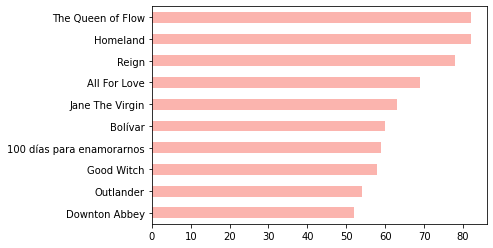

In [25]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

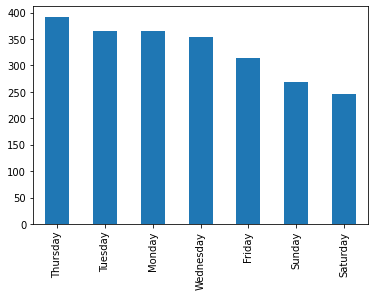

In [26]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

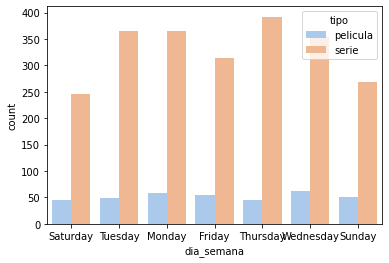

In [28]:
sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

Distribucion por mes antes de la pandemia

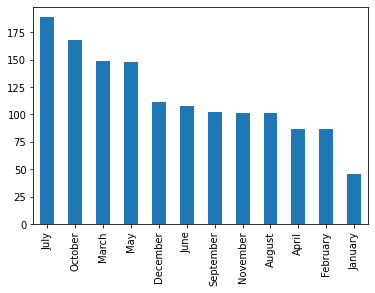

In [31]:
df.loc[df.año < 2020].mes.value_counts().plot.bar();

Datos con los de la pandemia

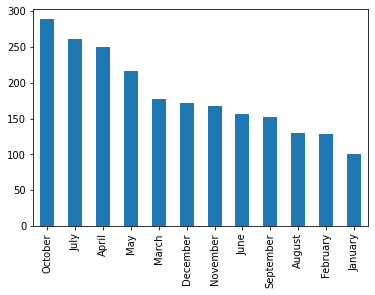

In [32]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

Como ha estado la pandemia

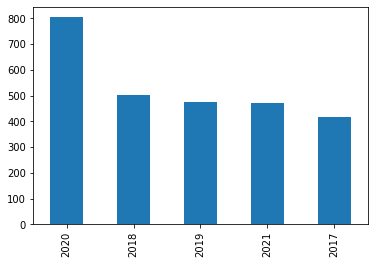

In [30]:
df.año.value_counts().plot.bar();